In [41]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('result/manual.csv')
df.head()

,mati,luka,hilang,tenggelam,pesawat,klasifikasi
0,7,1.0,0,0,0,sedang
1,5,12.0,1,0,0,sedang
2,1,1.0,0,0,0,rendah
3,3,0.0,1,0,0,sedang
4,0,5.0,0,0,0,rendah


In [43]:
from jcopml.plot import plot_missing_value

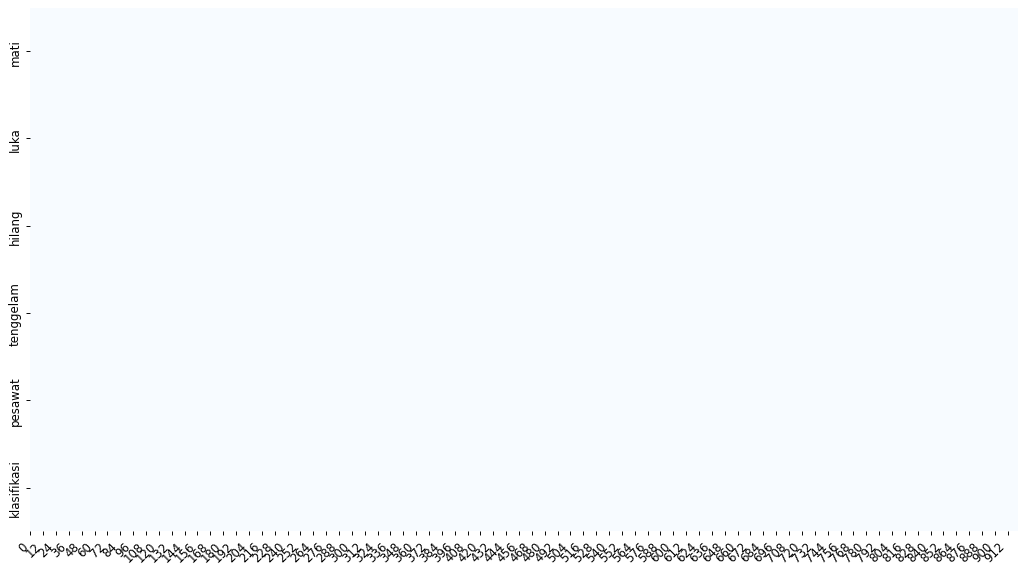

In [44]:
plot_missing_value(df)

In [45]:
data = df
data.klasifikasi.value_counts()

rendah    575
sedang    260
tinggi     87
Name: klasifikasi, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
X= data.drop(['klasifikasi'], axis='columns')
y= data['klasifikasi']

In [48]:
y

0      sedang
1      sedang
2      rendah
3      sedang
4      rendah
        ...  
917    rendah
918    rendah
919    rendah
920    sedang
921    sedang
Name: klasifikasi, Length: 922, dtype: object

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
d_tree = DecisionTreeClassifier()

In [51]:
d_tree.fit(X,y)

DecisionTreeClassifier()

In [52]:
d_tree.score(X,y)

1.0

# SPLIT DATASET

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X= data.drop(['klasifikasi'], axis='columns')
y= data['klasifikasi']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)


In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((737, 5), (185, 5), (737,), (185,))

In [57]:
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

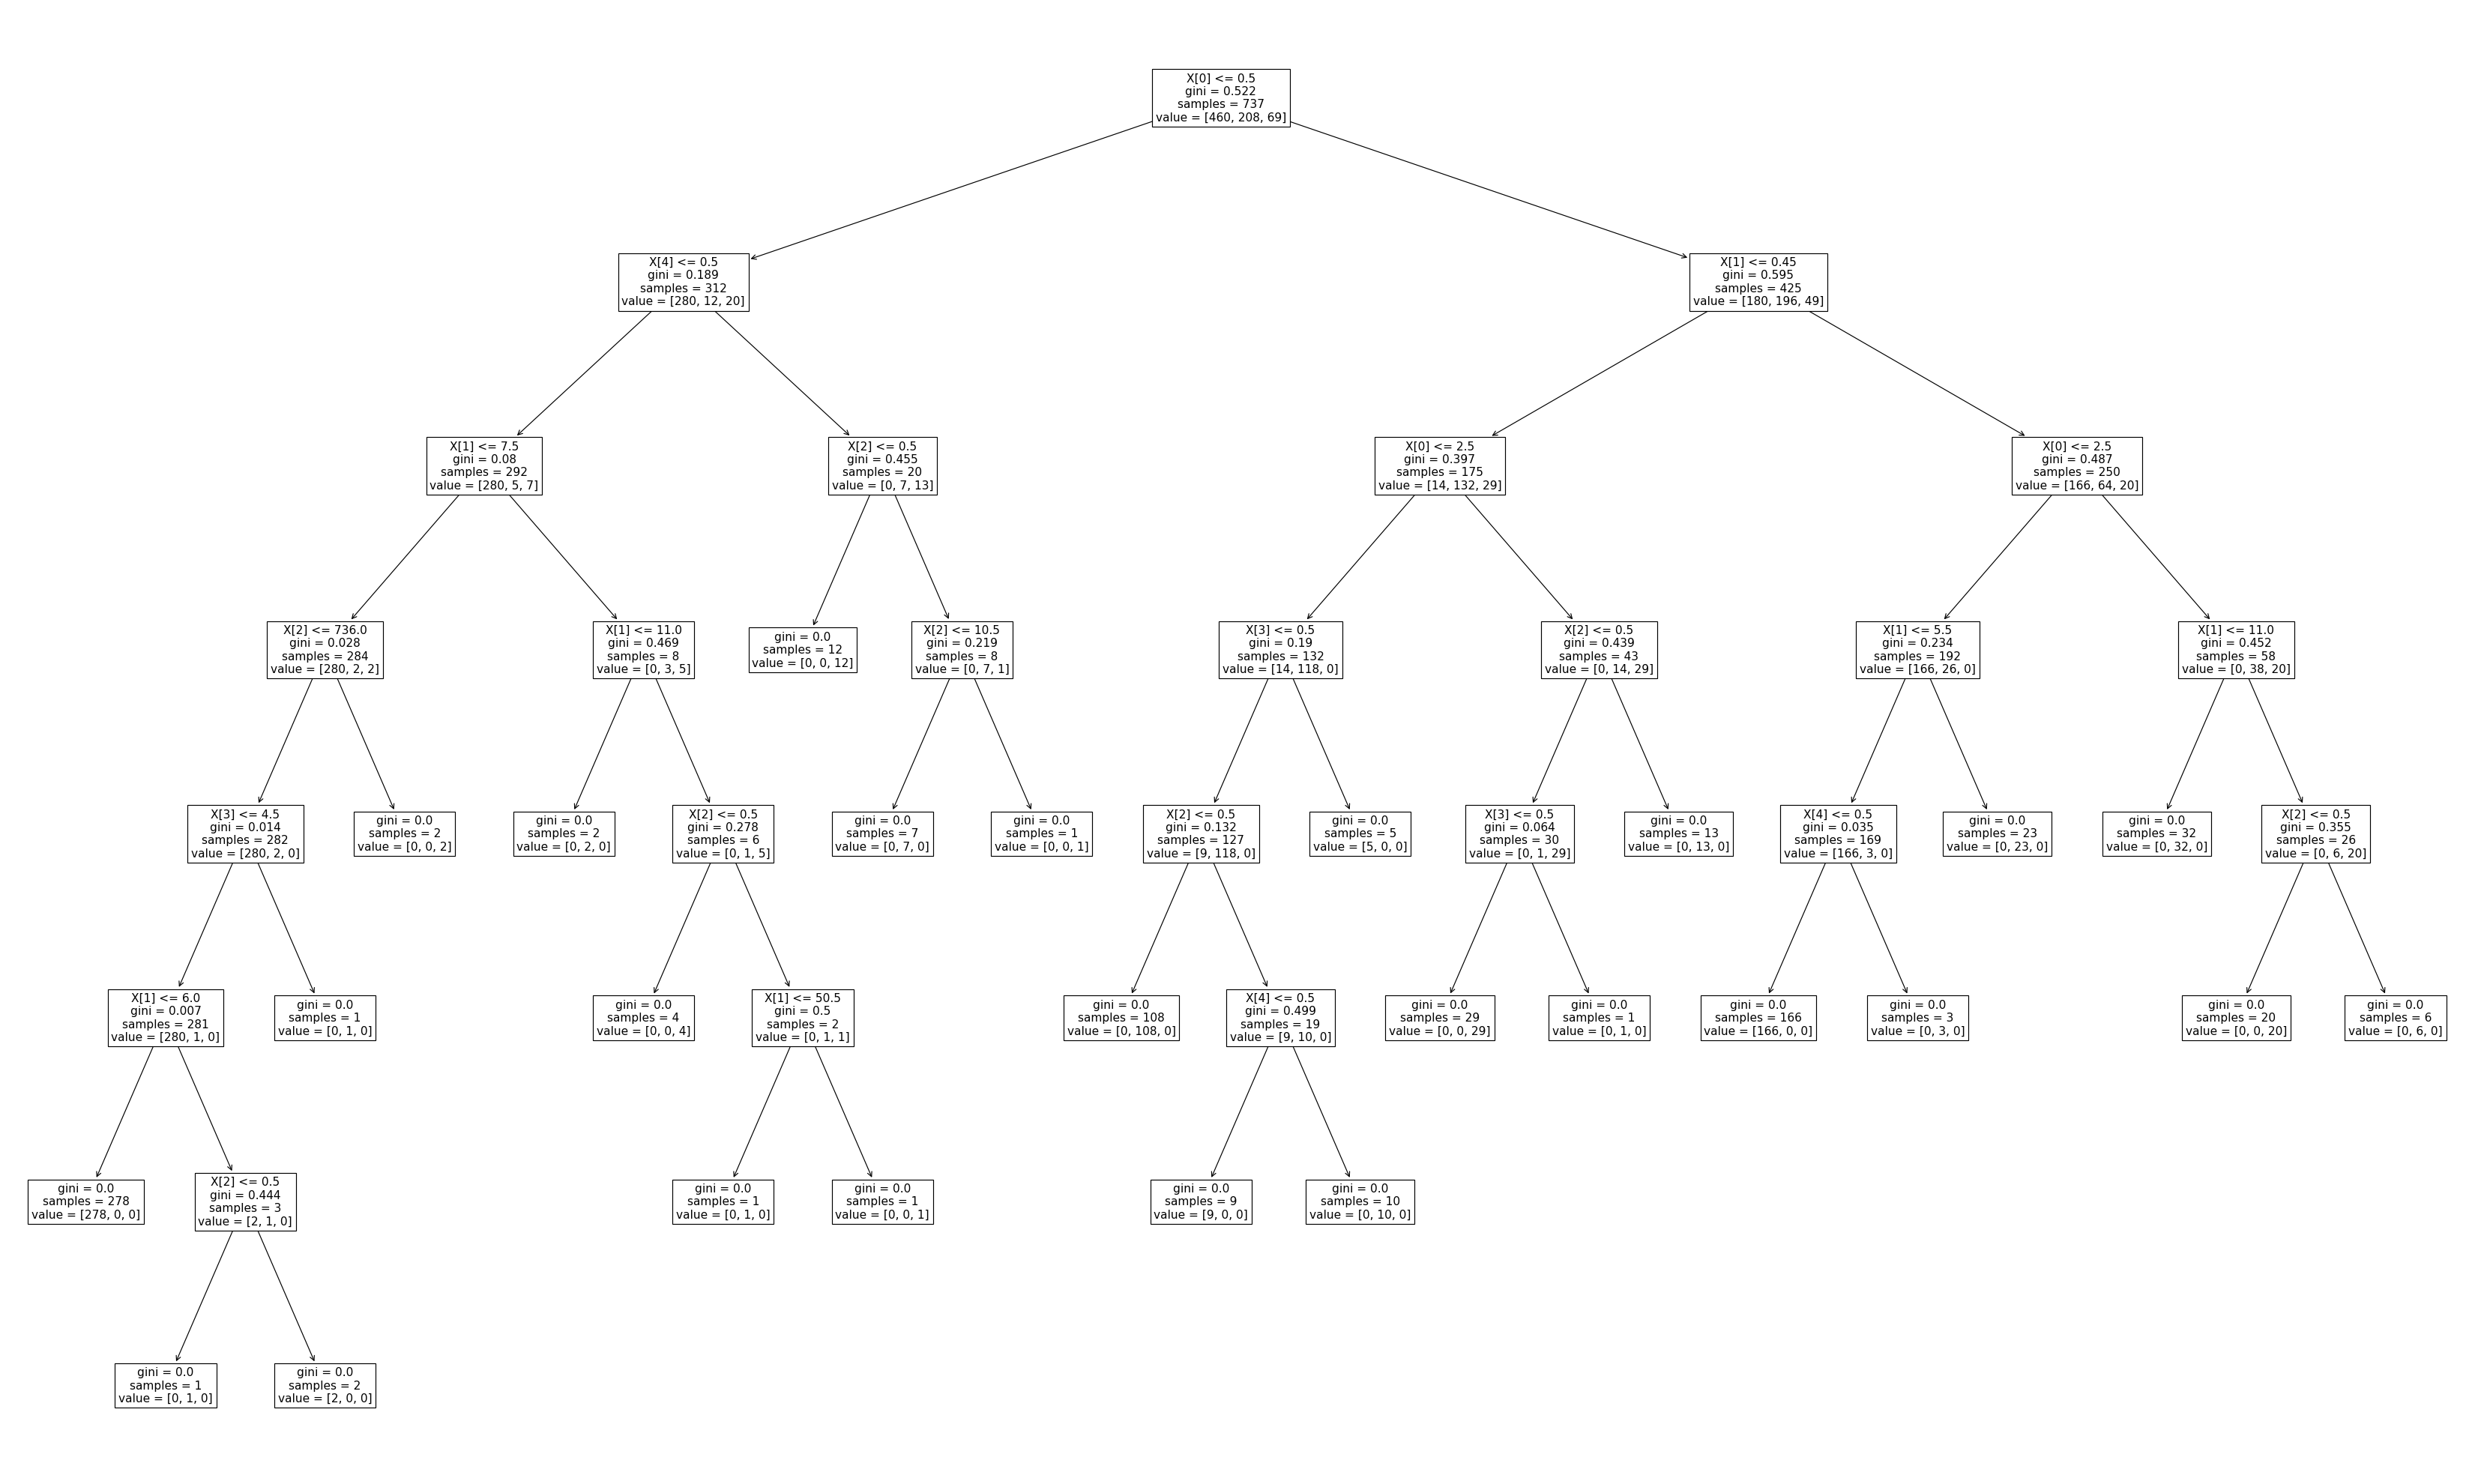

In [58]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train.values,y_train.values)
# print(d_tree.score(X_test.values,y_test.values))
y_pred = d_tree.predict(X_test.values)
plt.rcParams['figure.dpi'] =85
plt.subplots(figsize=(50,30))
tree.plot_tree(d_tree, fontsize=13)
plt.show()

In [59]:
d_tree.score(X_test,y_test)

c:\Python\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.9945945945945946

c:\Python\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


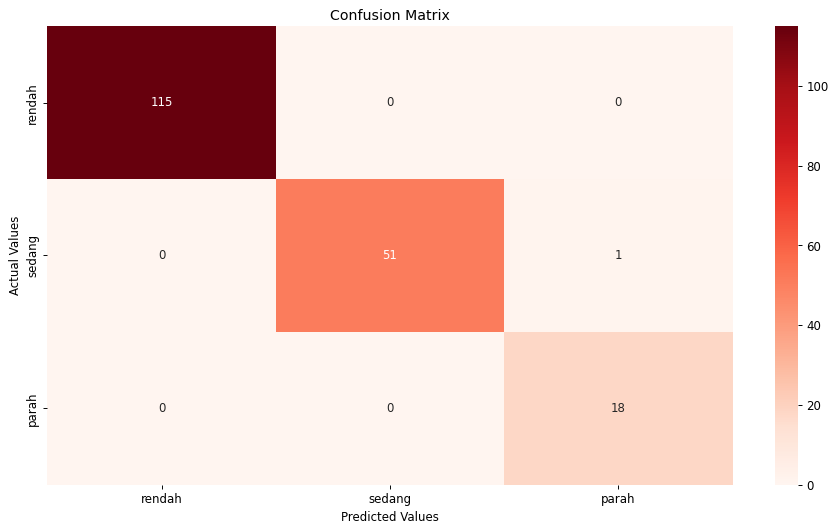

In [60]:
y_pred_dtree = d_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dtree)
cm_df = pd.DataFrame(cm,
                     index = ['rendah','sedang','parah'], 
                     columns = ['rendah','sedang','parah'])
plt.figure(figsize=(13,7))
plt.title("Confusion Matrix")
sns.heatmap(cm_df, annot=True,fmt='d', cmap='Reds')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')